<a href="https://colab.research.google.com/github/Rafael-Salomao/Predicao_de_Churn_para_Empresa_de_Telecomunicacoes/blob/main/Predicao_de_Churn_para_Empresa_de_Telecomunicacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de Churn para Empresa de Telecomunicações

## Entender o problema

<p align=center>
<img src="https://www.chargify.com/blog/wp-content/uploads/2019/06/churn_v2@2x.png" width="80%"></p>

### O que é churn de clientes?

O churn de clientes refere-se ao ciclo natural de negócios de perder e adquirir clientes. Toda empresa – não importa a qualidade de seus produtos ou atendimento ao cliente – experimenta churn. De um modo geral, quanto menos churn você tiver, mais clientes você manterá.

### O que é uma taxa de churn (churn rate)?
A taxa de churn é a taxa na qual os clientes param de fazer negócios com uma empresa durante um determinado período de tempo. O churn, também pode se aplicar ao número de assinantes que cancelam ou não renovam uma assinatura. Quanto maior a sua taxa de churn, mais clientes param de comprar da sua empresa. Quanto menor a taxa de churn, mais clientes você retém. Normalmente, quanto menor sua taxa de churn, melhor.

### Por que o churn de clientes é importante?
Compreender a rotatividade de clientes é essencial para avaliar a eficácia de seus esforços de marketing e a satisfação geral de seus clientes. Também é mais fácil e barato manter os clientes que você já tem do que adquirir novos. Devido à popularidade dos modelos de negócios de assinatura, é fundamental que muitas empresas entendam onde, como e por que seus clientes podem estar mudando.

<p align=center>
<img src="https://marketup.com/wp-content/uploads/2021/10/vazou-1.jpg" width="80%"></p>

### Por que a taxa de churn é importante no setor de telecomunicações?

Diante do exposto, o churn rate é uma medida fundamental a ser utilizada e monitorada para entender a saúde de uma empresa e, sobretudo, suas perspectivas futuras. No entanto, para as empresas de telecomunicações, uma análise completa da taxa de churn é importante, pois esse setor está entre os mais voláteis e, consequentemente, possui um alto nível de concorrência.

Neste setor, os clientes tendem a mudar de operadora com muita frequência, seja para obter melhores condições de uso, seja para receber serviços tecnologicamente mais avançados que possam atender às expectativas do cliente, ou para encontrar uma melhor experiência do cliente. Seja como for, é fundamental reter clientes, até porque há poucos concorrentes e, portanto, uma pequena variação pode ter um impacto considerável nos segmentos de mercado que abrange.

Isso é confirmado por um estudo Small Business Trends, que descobriu que 65% das vendas são de clientes existentes. Além disso, a probabilidade de vender para um cliente fiel é de 70%, enquanto a probabilidade de comprar de um cliente em potencial pela primeira vez fica dentro de uma faixa bastante estreita de 5% a 20%. Como se isso não bastasse, não se esqueça que são os consumidores mais fiéis que gastam mais em, também porque estão mais inclinados a experimentar novos produtos, proporcionando assim valiosas oportunidades de negócio crescimento.

Diante de tudo isso, podemos dizer que um aumento descontrolado da taxa de churn se traduz em perda de lucro, que, se não controlada, pode se tornar substancial no longo prazo. Então, o projeto em questão tem o intuito de elaborar um modelo de predição de churn, para que seja possível entender melhor o comportamento dos clientes que ficam e que saem.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/), e tratam de um problema típico de uma companhia de telecomunicações. O dataset completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

O dataset conta com mais de sete mil linhas e vinte e uma colunas.

Sendo que, cada linha representa um cliente, cada coluna contém os atributos do cliente descritos na coluna Metadados.
O conjunto de dados inclui informações sobre:
- Clientes que saíram no último mês – a coluna é chamada de Churn
- Serviços para os quais cada cliente se inscreveu – telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes
- Informações da conta do cliente – há quanto tempo eles são clientes, contrato, forma de pagamento, cobrança sem papel, cobranças mensais e cobranças totais
- Informações demográficas sobre os clientes – sexo, faixa etária e se eles têm parceiros e dependentes

### Obtenção dos dados

In [1]:
# instalar pacotes necessários
!pip install scikit-plot -q
!pip install imbalanced-learn -q

In [17]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("husl")

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/Rafael-Salomao/Predicao_de_Churn_para_Empresa_de_Telecomunicacoes/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

print('A dimensão do dataset total é: {}'.format(df.shape))

A dimensão do dataset total é: (7043, 22)


##Explorar os dados




### Visualização dos dados
A partir das primeiras visualizações, já é possível notar pontos relevantes para o projeto:

- A coluna alvo se trata da coluna `churn`, em que:
  - `0 = não churn`;
  - `1 = churn`.

- `customerID` é o ID de cada cliente. Se tratam de entradas individuais e, por isso, não será útil na construção do modelo de machine learning.

- A grande maioria das variáveis são categóricas. Por conta disso, será necessário aprofundar as análises, para identificar quais tratamentos terão melhores desempenhos no modelo de machine learning que será estruturado.

In [ ]:
# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# ver as 5 últimas entradas
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Seguindo a exploração dos dados, pode-se identificar a quantidade de entradas diferentes presente em cada uma das variáveis. A quantidade de entradas presentes é determinante para definir o tratamento que será realizado na coluna em questão, durante a etapa de modelagem dos dados.

Para saber mais a respeito do tratamento de dados categóricos, pode encontrar mais detalhes [neste artigo](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).

Além da análise feita nas variáveis categóricas, também é possível notar uma inconsistência com a variável `TotalCharges`. Uma vez que nas visualizações acima, as informações presentes são dados numéricos, o tipo objeto - observado abaixo - não corresponde ao esperado. Contudo, será necessário verificar a variável a fim de identificar se existem entradas indesejadas.

In [ ]:
# verificar tipos das variáveis
print('-> Tipos das variáveis:\n{}'.format(df.dtypes))

# verificar valores nulos por variáveis
print('\n-> Soma da valores nulos em cada variável:\n{}'.format(df.isnull().sum()))

# verificar soma de valores nulos
print('\n-> A soma dos valores nulos no dataset é: {}'.format(df.isnull().sum().max()))

# verificar nome das variáveis
print('\n-> Nome das variáveis:\n{}'.format(df.columns))

# verificar valores únicos por variável
print('\nValores únicos por variável>\n{}'.format(df.nunique()))

-> Tipos das variáveis:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

-> Soma da valores nulos em cada variável:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0


### Limpeza dos dados

Conforme citado, ao tentar converter a variável `TotalCharges` para flot64, encontra-se um erro indicando que há strings na variável. Para isso será preciso implementar uma função para identificar os valores indesejados e transformar as strings em nan, e, posteriormente, ser possível alterar o formato da variável `TotalCharges` em float64 e dar sequencia no projeto.

In [ ]:
# # converter `TotalCharges`para float64
# df.TotalCharges.astype('float64')

In [ ]:
def transf_str_float(entrada):
    """
    Converte um objeto do tipo string em float.

    # Arguments
        entrada: string, string da coluna TotalCharges.

    # Returns
        Valor convertido em float, caso permita a conversão.
        NaN, caso o valor não seja apropriado.
    """
    
    try:
      return float(entrada)
    except ValueError:
      return np.nan

# criar copia do dataset
df_clean = df.copy()

# remover variável `customerID` do dataset
df_clean.drop('customerID', axis=1, inplace=True)

# transformar string em float64 na variável `TotalCharges`
df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(transf_str_float)

print('Antes do tratamento:')
# verificar quantidade de valores convertidos de string para nan
print('Existem {} entradas NaN na variável `TotalCharges`\n'.format(df_clean['TotalCharges'].isnull().sum()))

# transformar valores nan na mediana da variável `TotalCharges`
median_TotalCharges = df_clean.TotalCharges.median()
df_clean.TotalCharges.fillna(median_TotalCharges, axis=0, inplace=True)

print('Após o tratamento:')
print('Existem {} entradas NaN na variável `TotalCharges`\n'.format(df_clean.TotalCharges.isna().sum()))

Antes do tratamento:
Existem 11 entradas NaN na variável `TotalCharges`

Após o tratamento:
Existem 0 entradas NaN na variável `TotalCharges`



### Análise estatística

A análise descritiva estatística dos valores é fundamental para entender o comportamento da variáveis numéricas do dataset. A partir da função `describe()` e plot dos gráficos `boxplot`, pode-se elecar duas observações a serem consideradas:

- A coluna `TotalCharges` não apresenta outliers, quando analisada como um todo. No entanto, ao verificar apenas as entradas de churn, observa-se a presença de outliers. Apesar disso, não será necessário tratar esses valores. Contudo, tal observação pode ser um indício de que cliente que já pagaram altas quantias, tendem a cancelarem suas assinaturas.
 
- Ao verificar a coluna `MonthlyCharges`, a média das entradas que indicam churn, é maior que a média dos não churns. Já para `TotalCharges`, a média das entradas que indicam churn, é menor que a média dos não churns. Este fato pode indicar uma tendência de desistência maior para usuários com maiores taxas mensais de assinatura. 

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


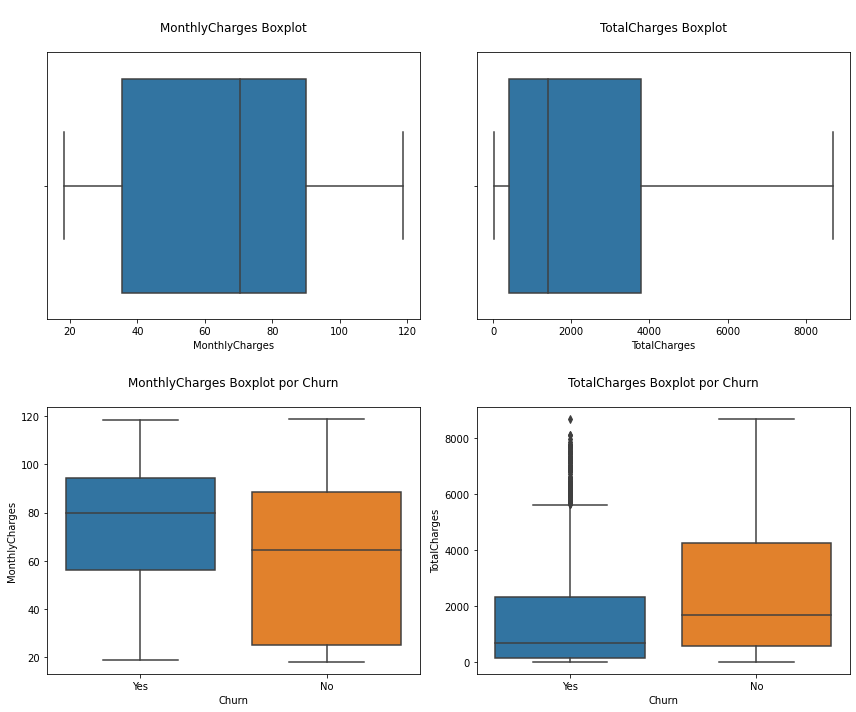

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=((12,10)))
# plot gráfico bloxplot para verificar a distribuição da variável "MonthlyCharges"
sns.boxplot(x='MonthlyCharges', data=df_clean, ax=ax[0,0])
ax[0,0].set_title('\nMonthlyCharges Boxplot\n')

# plot gráfico bloxplot para verificar a distribuição da variável "MonthlyCharges"
sns.boxplot(x='TotalCharges', data=df_clean, ax=ax[0,1])
ax[0,1].set_title('\nTotalCharges Boxplot\n')

# plot gráfico bloxplot para verificar a distribuição das entradas de "MonthlyCharges"
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_clean, order=['Yes','No'], ax=ax[1,0])
ax[1,0].set_title('\nMonthlyCharges Boxplot por Churn\n')

# plot gráfico bloxplot para verificar a distribuição das entradas de "TotalCharges"
sns.boxplot(x='Churn', y='TotalCharges', data=df_clean, order=['Yes','No'], ax=ax[1,1])
ax[1,1].set_title('\nTotalCharges Boxplot por Churn\n')

plt.tight_layout()

### Verificar balanceamento

Ao avaliar o balanceamento da variável alvo `Churn`, é possível observar a maior frequência de inputs `No`, com relação a `Yes`. Este comportamento será tratado antes da execução do modelo de machine learning.

Churn Yes: 1869
Churn No: 5174
A porcentagem que corresponde a quantidade de churn no dataset é de: 26.54%



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


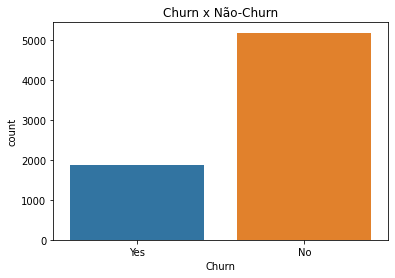

In [ ]:
## ver balanceamento do dataset: churn x não churn
# entradas com churn "yes"
df_yes_churn = df_clean.loc[df['Churn'] == 'Yes']

# entradas com churn "no"
df_no_churn = df_clean.loc[df['Churn'] == 'No']

# quantidade de valores "churn" e "não-churn"
print('Churn Yes: {}'.format(df_yes_churn.shape[0]))
print('Churn No: {}'.format(df_no_churn.shape[0]))

# porcentagem de "churns" com relação ao dataset
print('A porcentagem que corresponde a quantidade de churn no dataset é de: {:.2f}%\n'
      .format(df_yes_churn.shape[0]/df_clean.shape[0]*100))

# plot gráfico de barras para comparação churn x não churn
fig, ax = plt.subplots()
sns.countplot('Churn', data=df_clean, order=['Yes', 'No'])
plt.title('Churn x Não-Churn')
plt.show()

### Histogramas

Para finalizar a exploração dos dados, serão plotados histogramas para visualização do comportamento das variáveis numéricas em comparação ao vetor alvo, `Churn`.


#### MothlyCharges x Churn

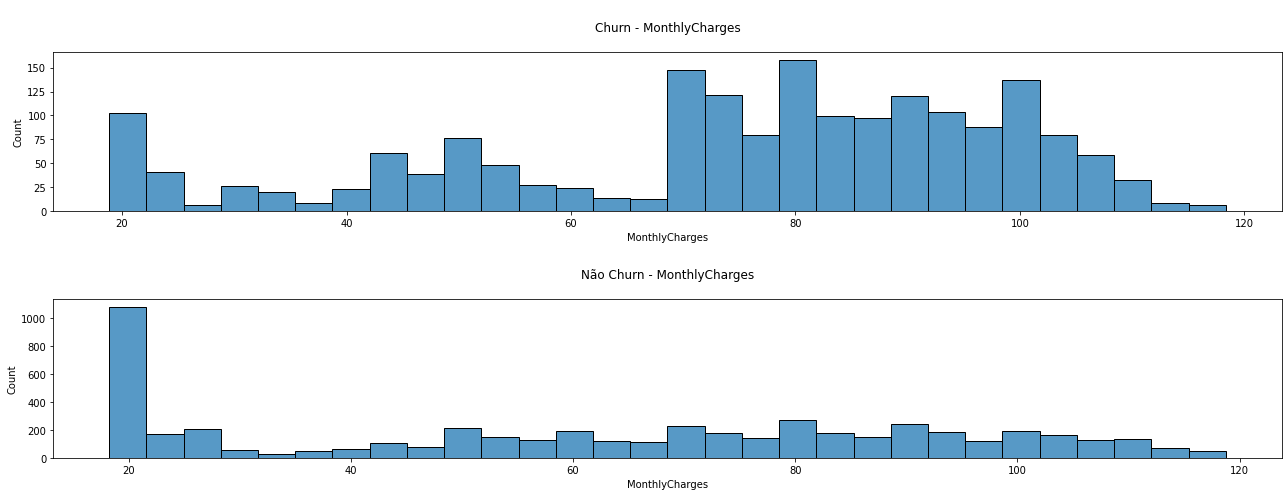

In [ ]:
from IPython.core.pylabtools import figsize
# plot de histogramas das variáveis "MonthlyCharges" para Churn
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(18,7))
sns.histplot(data=df_clean,x=df_clean.MonthlyCharges[df['Churn'] =='Yes'], bins=30, ax=ax[0])
ax[0].set_title('\nChurn - MonthlyCharges\n')

# plot de histogramas das variáveis "MonthlyCharges" para Não-Churn
sns.histplot(data=df_clean,x=df_clean.MonthlyCharges[df['Churn'] =='No'], bins=30, ax=ax[1])
ax[1].set_title('\nNão Churn - MonthlyCharges\n')
plt.tight_layout()

#### TotalCharges x Churn

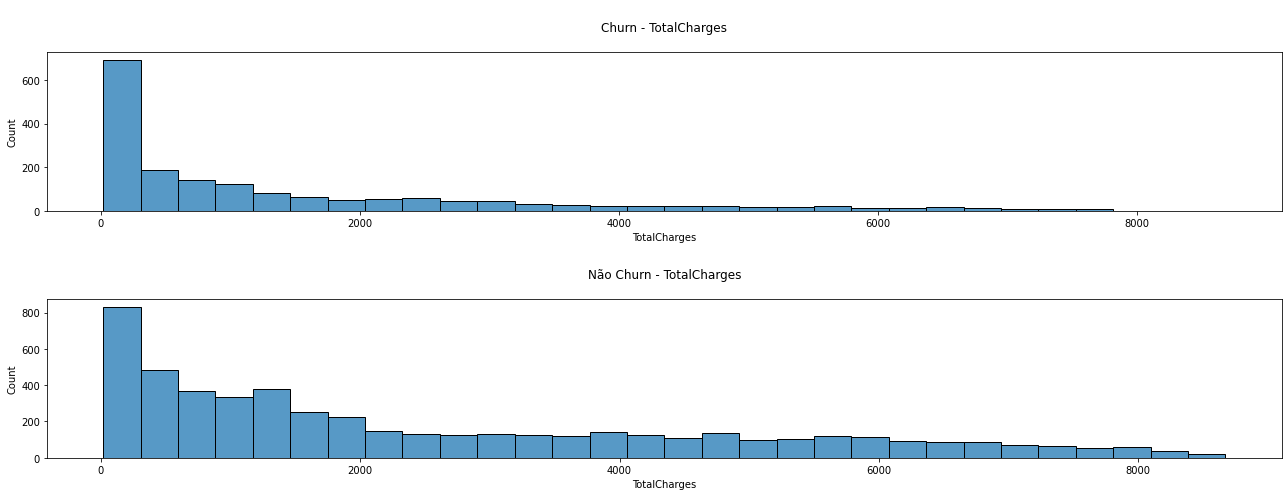

In [ ]:
# plot de histogramas das variáveis "TotalCharges" para Churn
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(18,7))
sns.histplot(data=df_clean,x=df_clean.TotalCharges[df['Churn'] =='Yes'], bins=30, ax=ax[0])
ax[0].set_title('\nChurn - TotalCharges\n')

# plot de histogramas das variáveis "TotalCharges" para Não-Churn"
sns.histplot(data=df_clean,x=df_clean.TotalCharges[df['Churn'] =='No'], bins=30, ax=ax[1])
ax[1].set_title('\nNão Churn - TotalCharges\n')
plt.tight_layout()

A partir do plot dos histogramas, é possível ter uma visão ampla e geral da distribuição das variáveis. Com base neles, é válido elencar três proposições:

- Existe uma tendência de que a maior quantidade de clientes que realizam churn, tem uma mensalidade mais cara.

- Para as mensalidades total, não apresentam padrões que indicam alguma tendência no comportamento dos clientes considerados churn.

- A visualização auxilia em um melhor panorama da relação de cliente churn com o `TotalCharges` desvalidando a hipótese sugerida anteriormente, na análise estatística. Entretanto, pode-se observar uma maior concentração de `Churn` que representam valores mais baixos na variável `TotalCharges`, o que sugere a presença dos outliers encontrados na etapa precedente.


#### Tenure x Churn 

Antes de aprensentar o histograma da variável `Tenure`, é importante mencionar seu significado. De acordo com a [plataforma da IBM](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
), está variável representa o total de meses que o cliente é assinante do serviço.

Oara está variável, é interessante intensificar a análise e comparar `Tenure`x`Churn` com o tipo de contrato feito pelo cliente. Sendo assim, a partir dos plots executados, têm-se insights relevantes a respeito do comportamento dos usuários, como: 

- Os cliente que aderem o plano mensal, em sua maioria, tendem a virar churn nos primeiros meses. O que sugere a presença de "curioso", que adquirem a assinatura apenas para testar a funcionalidade do serviço prestado.

- Para contratos anuais, observa-se um comportamento não padronizado, em que, observa-se picos maiores nos meses em que se encerram ciclos de um ano, como 12, 24, 36, 48 meses. O que sugere uma maior desistência em momentos de renovação de contrato.

- Já para contratantes do plano de dois anos, há a tendência de serem clientes mais fieis e utilizarem o serviço da empresa de telecomunicações por mais tempo. A partir do gráfico, é possível observar que, o período onde está localizado o maior volume de clientes com contrato bi-anual e churn, é por volta dos 70 meses de utilização do serviços. Sendo que, 70 meses é o equivalente a cerca de 6 anos de utilização do serviço.

Tendo em visto o que foi dito, foi possível elencar informações de grande relevância para o negócio. Com essas informações pode-se avaliar qual tipo de contrato é mais vantajoso para o negocio e, assim, pensar em estratégias para promover a assinatura de contratos de dois anos. Como também elaborar estratégia de downgrades ou upgrades a fim de fidelizar o cliente antes que se torne um churn.

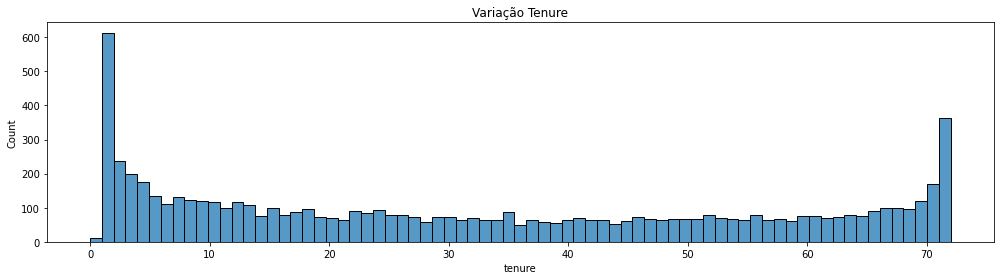

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,4))
sns.histplot(data=df_clean[(df_clean['Churn'] =='Yes')], x=df_clean.tenure, bins=df_clean.tenure.nunique(), ax=ax)
ax.set_title('Variação Tenure')
plt.tight_layout()

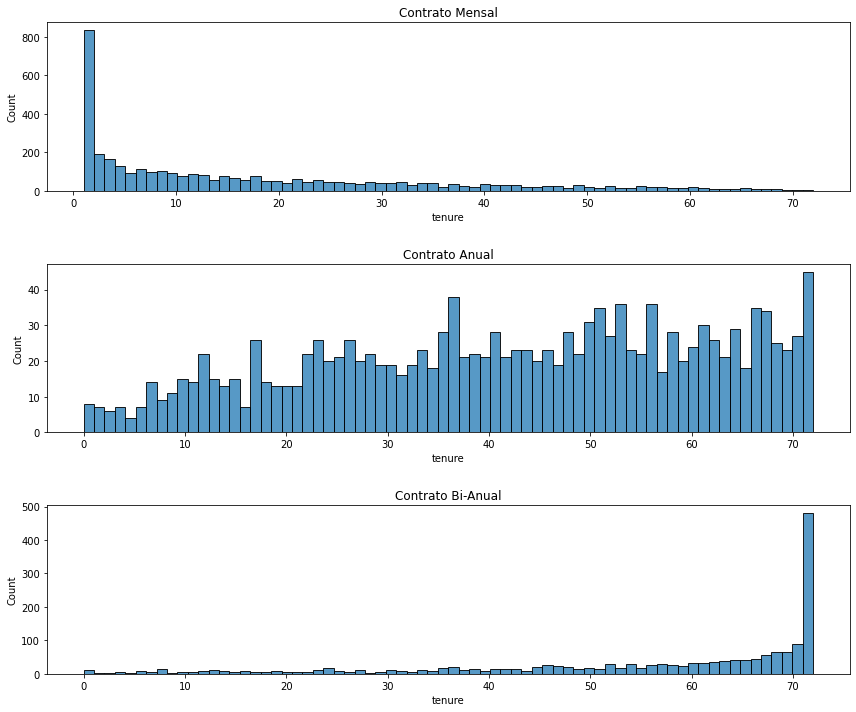

In [ ]:
# filtro pra contratos: mensal, um ano e dois anos
mensal_contrato = df_clean['Contract'] == df_clean['Contract'].unique()[0] # Month-to-month
anual_contrato = df_clean['Contract'] == df_clean['Contract'].unique()[1] # One Year
bianual_contrato = df_clean['Contract'] == df_clean['Contract'].unique()[2] # Two Year

# plotar histogramas da distribuição das quantidades de mês por tipo de contrato do cliente
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,10))
sns.histplot(data=df_clean[(df_clean['Churn'] =='Yes') & (mensal_contrato)], x=df_clean.tenure[mensal_contrato], bins=70, ax=ax[0])
ax[0].set_title('Contrato Mensal')

sns.histplot(data=df_clean[(df_clean['Churn'] =='Yes') & (anual_contrato)], x=df_clean.tenure[anual_contrato], bins=70, ax=ax[1])
ax[1].set_title('\nContrato Anual')

sns.histplot(data=df_clean[(df_clean['Churn'] =='Yes') & (bianual_contrato)], x=df_clean.tenure[bianual_contrato], bins=70, ax=ax[2])
ax[2].set_title('\nContrato Bi-Anual')

plt.tight_layout()

### Modelagem dos dados

Após a exploração dos dados e elencar insights sobre o dataset, é necessário realizar a modelagem dos dados para dar adequa-los aos modelos de machine learning que serão implementados.

#### Tratando variáveis categóricas

 Conforme visto anteriormente, o dataset conta com variáveis categóricas, que necessitam de tratamentos. Tendo isso em vista e levando em consideração a quantidade de entradas únicas nas variáveis, serão realizadas as seguintes tratativas:

- **Para colunas com três ou quatro entradas**: será utilizado o `dummies value`. Em que, a partir dos valores únicos encontrados em uma coluna, a função `get_dummies()`, cria novas colunas no dataset - referente aos diferentes valores. Os valores das novas colunas, assumem um valor de 0 ou 1 para indicar a ausência ou presença de um valor categórico correspondente à coluna criada em questão. 

- **Para colunas com duas entradas**: será aplicado o `label encoder`. Em que, transforma os dados categóricos em 0 e 1, para indicar ausência ou presença de uma informação.

In [ ]:
# separar variáveis binárias
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
print('-> Variáveis binárias:\n{}'.format(binary_var))

# separar variáveis numéricas
num_var = []
for col in df_clean.select_dtypes(['int','float64']):
  if col not in binary_var:
    num_var += [col]
print('\n-> Variáveis numéricas:\n{}'.format(num_var))

# separar variáveis categóricas
cat_var = []
for col in df_clean.nunique()[df_clean.nunique() > 2].keys():
  if col not in (binary_var and num_var):
    cat_var += [col]
print('\n-> Variáveis categóricas:\n{}'.format(cat_var))

-> Variáveis binárias:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

-> Variáveis numéricas:
['tenure', 'MonthlyCharges', 'TotalCharges']

-> Variáveis categóricas:
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [ ]:
# criar copia do dataset para processar os dados
df_proc = df_clean.copy()

# aplicar label encoder em cada uma das colunas binárias
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in binary_var:
  df_proc[i] = le.fit_transform(df_proc[i])

# criar dummies para as colunas não numéricas e com mais de duas entradas diferentes
df_proc = pd.get_dummies(df_proc, columns=cat_var)

##### Heatmap

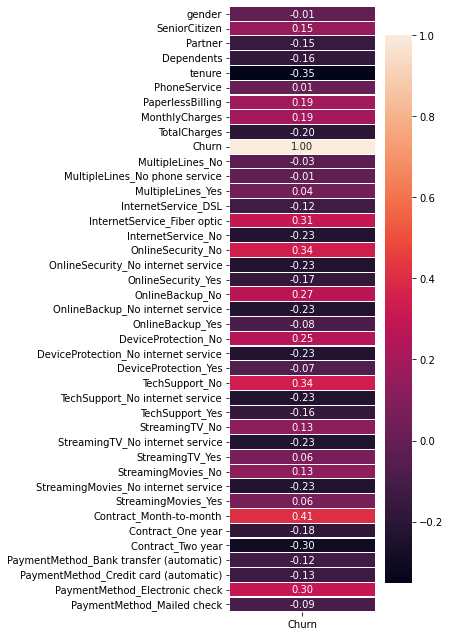

In [ ]:
# plotar mapa de correlação
corr = df_proc.corr()

fig, ax = plt.subplots(figsize=((6,9)))
sns.heatmap(corr[['Churn']], linewidths=.1, annot=True, fmt=".2f")
plt.tight_layout()

#### Separar em treino e teste

In [ ]:
# preparar a matriz de features e vetor alvo
X = df_proc.drop('Churn',axis = 1)
y = df_proc['Churn']

# separar dataset em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, shuffle=True)

#### Cross-Validation

A fim de implementar testar diferentes modelos de machine learning e verificar o desempenho de cada um no problema em questão, é criado um pipeline para implementação do cross-validation em cada instância. O pipeline é executado a partir de uma função, que irá padronizar e executar o modelo em questão.

Para esta avaliação dos modelos, serão utilizados apenas dados de treino para alimentar a função criada. A métrica aplicada para avaliação será `recall`. 

A métrica foi definida, partindo da premissa de que, pelo fato de, se tratar da predição de churn na empresa. Isso implica que, se o modelo detecta um cliente que não iria cancelar, mas a predição indica que ele vai cancelar, este erro pode resultar em um e-mail ou promoção extra - a depender da estratégia adotada pela companhia -, sem que o cliente tome consciência do erro ou cause grandes impactos financeiros na empresa. Já um cliente que cancela sua assinatura, gera um maior prejuizo para a organização.

Entretanto, esta foi a premissa adotada para este projeto hipotético, especificamente. Para um projeto real, deve-se debater internamente, qual será a melhor métrica a ser considerada, a depender de n variáveis que possam estar em jogo. Há um trade-off que necessita ser debatido no momento de implementação deste projeto.

Tendo isso em vista, para o baseline inicial, é usado o `RandomForestClassifier()`, sem considerar nenhum hyperparâmetro. Para isso, os dados utilizados são os de treino.

In [ ]:
# importar bibliotecas para função cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# definir função para cross-validation dos modelos a serem instanciados.
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.4f} (+/- {:.4f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

In [ ]:
 # importar biblioteca para baseline
from sklearn.ensemble import RandomForestClassifier

# instanciar baseline
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Recall: 0.4890 (+/- 0.0404)


#### Padronizar e balancear o dataset

É importante ter um baseline para comparar se os ajustes, que serão feitos, melhoram ou pioram o desempenho do modelo. O balanceamento dos dados será feito e, em seguida, será preciso avaliar qual foi o impacto da alteração.

A técnica escolhida para o balanceamento foi `UnderSampling()`, após alguns testes de desempenho das outras. Antes da execução da técnica de balanceamento, os dados serão padronizados.

Lembrando que, é importante que a padronização e balanceamento seja feito apenas com os dados de treino. Os dados de teste devem permanecer intocáveis, para evitar o vazamento ou enviesamento dos dados.

In [ ]:
# padronizar o dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 


# contar valores churn e não-churn no vetor alvo
print('-> Valores de ´Churn´ e ´Não-Churn´ antes do balanceamento:\n{}\n'.format(y_train.value_counts()))

# aplicar balanceamento: Over-Sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# contar valores após balanceamento
print('-> Valores de ´Churn´ e ´Não-Churn´ após balanceamento:\n{}'.format(y_train_rus.value_counts()))

-> Valores de ´Churn´ e ´Não-Churn´ antes do balanceamento:
0    4139
1    1495
Name: Churn, dtype: int64

-> Valores de ´Churn´ e ´Não-Churn´ após balanceamento:
0    1495
1    1495
Name: Churn, dtype: int64


## Construir modelo de Machine Learning

O cross-validation será aplicado para vários modelos, a fim de identificar seus desempenhos e escolher o mais adequado para a solução desejada. Novamente, erão utilizados apenas dados de treino. Os modelos escolhidos são:

- Logistic Regression

- Decision Tree Classifier 

- XGBoost Classifier

- Random Forest Classifier

- SVC


### Instanciar, treinar e verificar desempenho dos modelos

Ao avaliar o desempenho dos modelos, vê-se que a Logistic Regression tem desempenho similar ao XGBoost. No entanto, optou-se por seguir o projeto utilizando o XGBoost. 

A escolha foi feita pelo fato de que a instância do XGBoost apresenta uma maior margem de manipulação de seus hyperparametros. E, com isso, apresenta conjuntura para intensificar seus parâmetros e, consequentemente, melhorar seu desempenho. Inclusive, o tuning dos parametros será feita tomando como base um [artigo da Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/). 

In [ ]:
# importar biblioteca dos modelos a serem instanciados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# instanciar modelos
lr = LogisticRegression()
dt = DecisionTreeClassifier() 
xgb = XGBClassifier()
rfc = RandomForestClassifier()
svc = SVC()

# avaliar os modelos
modelo = []
recall = []
for clf in (lr, dt, xgb, rfc, svc):
  model_name = type(clf).__name__
  print('\n{}:'.format(model_name))
  val_model(X_train_rus, y_train_rus, clf)
  


LogisticRegression:
Recall: 0.7940 (+/- 0.0293)

DecisionTreeClassifier:
Recall: 0.6756 (+/- 0.0244)

XGBClassifier:
Recall: 0.8067 (+/- 0.0249)

RandomForestClassifier:
Recall: 0.7585 (+/- 0.0206)

SVC:
Recall: 0.7920 (+/- 0.0257)


### Tuning de parâmetros

In [ ]:
# XGBoost com GridSearch
xgb = XGBClassifier(learning_rate = 0.1)

parameters = {
    'n_estimators':range(0,100,5)
}

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=10, shuffle=True)
clf = GridSearchCV(xgb, parameters, scoring="recall", n_jobs=-1, cv=kfold)
clf.fit(X_train_rus, y_train_rus)

# verificar a acurácia com os melhores parâmetros.
print('O melhor recall é {:.4f} utilizando o parâmetro {}.'.format(clf.best_score_,clf.best_params_))

O melhor recall é 0.8180 utilizando o parâmetro {'n_estimators': 10}.


In [ ]:
# XGBoost com GridSearch
xgb = XGBClassifier(learning_rate = 0.1, n_estimators=10)

parameters = {
    'max_depth': range(0,10,1),
    'min_child_weight': range(0,5,1)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
clf = GridSearchCV(xgb, parameters, scoring="recall", n_jobs=-1, cv=kfold)
clf.fit(X_train_rus, y_train_rus)

# verificar a acurácia com os melhores parâmetros.
print('O melhor recall é {:.4f} utilizando o parâmetro {}.'.format(clf.best_score_,clf.best_params_))

O melhor recall é 0.8569 utilizando o parâmetro {'max_depth': 1, 'min_child_weight': 0}.


In [ ]:
# XGBoost com GridSearch
xgb = XGBClassifier(learning_rate = 0.1, n_estimators=10, max_depth=1, min_child_weight=0)

parameters = {
    'gamma':[i/100.0 for i in range(0,1)]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
clf = GridSearchCV(xgb, parameters, scoring="recall", n_jobs=-1, cv=kfold)
clf.fit(X_train_rus, y_train_rus)

# verificar a acurácia com os melhores parâmetros.
print('O melhor recall é {:.4f} utilizando o parâmetro {}.'.format(clf.best_score_,clf.best_params_))

O melhor recall é 0.8588 utilizando o parâmetro {'gamma': 0.0}.


In [ ]:
# XGBoost com GridSearch
xgb = XGBClassifier(n_estimators=10, max_depth=1, min_child_weight=0, gamma=0)

parameters = {
    'learning_rate':[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 0.01]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
clf = GridSearchCV(xgb, parameters, scoring="recall", n_jobs=-1, cv=kfold)
clf.fit(X_train_rus, y_train_rus)

# verificar a acurácia com os melhores parâmetros.
print('O melhor recall é {:.4f} utilizando o parâmetro {}.'.format(clf.best_score_,clf.best_params_))

O melhor recall é 0.8842 utilizando o parâmetro {'learning_rate': 1e-07}.


### Avaliar desempenho do modelo

Por fim, após definir o modelo de machine learning e fazer o tuning dos parâmetros, é preciso avaliar o desempenho do modelo final. A performance é realizada ao comparar as predições com a porção de teste, separada anteriormente no dataset.

Para esta análise final, o modelo será treinado usando os dados de treino e, a partir desse treinamento, as previsões serão feitas com os dados de teste - que serão manipulados apenas neste momento e seguiam intactos até então, desde a separação do dataset.

Conforme a premissa assumida, a partir da avaliação do modelo, é possível verificar um `recall` de 89% para clientes que serão considerados churn. Isso quer dizer que, é possivel detectar o churn dos clientes da empresa com eficácia: 89%. Ou seja, 89% dos clientes do conjunto de teste que são churn (ou seja, igual a `churn = 1`), foram identificados corretamente como churn, pelo modelo executado.



              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1035
           1       0.44      0.89      0.59       374

    accuracy                           0.67      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.80      0.67      0.68      1409

AUC: 0.7375



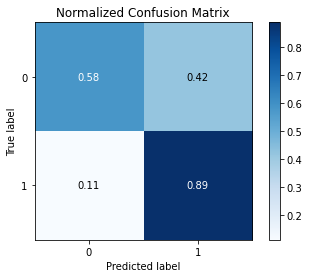

In [ ]:
# modelo final
xgb = XGBClassifier(n_estimators=10, max_depth=1, min_child_weight=0, gamma=0, learning_rate=1e-07)
xgb.fit(X_train_rus, y_train_rus)

# fazer predição do X_val
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# classification report
print(classification_report(y_test, y_pred))

# verificar área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## Conclusão

Por fim, o churn é um indicador que deve ser avaliado constantemente, principalmente à luz das crescentes pressões competitivas do setor de telecomunicações. No entanto, muitas empresas ainda não tomaram as medidas necessárias para construir uma base analítica sólida para estabelecer um mandato verdadeiramente validado para a tomada de decisões estratégicas para redução de Churn. Contudo, as empresas que se movem rapidamente estarão melhor posicionadas para o sucesso no futuro.

Neste projeto foram avaliados dados reais de uma empresa de telecomunicações e é plenamente possível que seja replicado em outras empresas reais com contam com modelo de assinaturas. Com o intuito de redução do churn, os insights obtidos podem ser grande valia para tomada de decisões como um novo roadmap do produto, desenvolver novas ferramentas, investir em customer experience, rever preços e agregar mais valor.

Toda via, vale ressaltar a possibilidade de melhoria ao modelo apresentado. Para isso, pode-se implementar outros recursos e ferramentas de análise como:  feature selection, identificar variaveis que mais influenciam a variável alvo e trabalhar com feature engineering são artifícios que podem ajudar a melhorar o desempenho do modelo.